In [2]:
import numpy as np 
import warnings
from tabulate import tabulate
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix ,classification_report
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler
import scipy.sparse
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from scipy.stats import kruskal
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import validation_curve

In [3]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", class_labels=None):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    
    if class_labels is None:
        class_labels = ['Class 0', 'Class 1', 'Class 2']  

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [4]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [5]:
major_data = pd.ExcelFile("CTG.xls")  
print(major_data.sheet_names)
description = pd.read_excel(major_data, sheet_name="Description") 
Data = pd.read_excel(major_data, sheet_name="Data") 
print(Data.head())
Raw_Data = pd.read_excel(major_data, sheet_name="Raw Data") 

['Description', 'Data', 'Raw Data']
  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          b          e         AC         FM         UC         DL   
1        240        357          0          0          0          0   
2          5        632          4          0          4          2   
3        177        779          2          0          5          2   
4        411       1192          2          0          6          2   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  ... Unnamed: 36 Unnamed: 37  \
0         DS         DP         DR         NaN  ...           E          AD   
1          0          0          0         NaN  ...          -1          -1   
2          0          0          0         NaN  ...          -1           1   
3          0          0          0         NaN  ...          -1           1   
4          0          0          0         NaN  ...          -1           1   

  Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42 

In [6]:
print(Raw_Data.columns)

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')


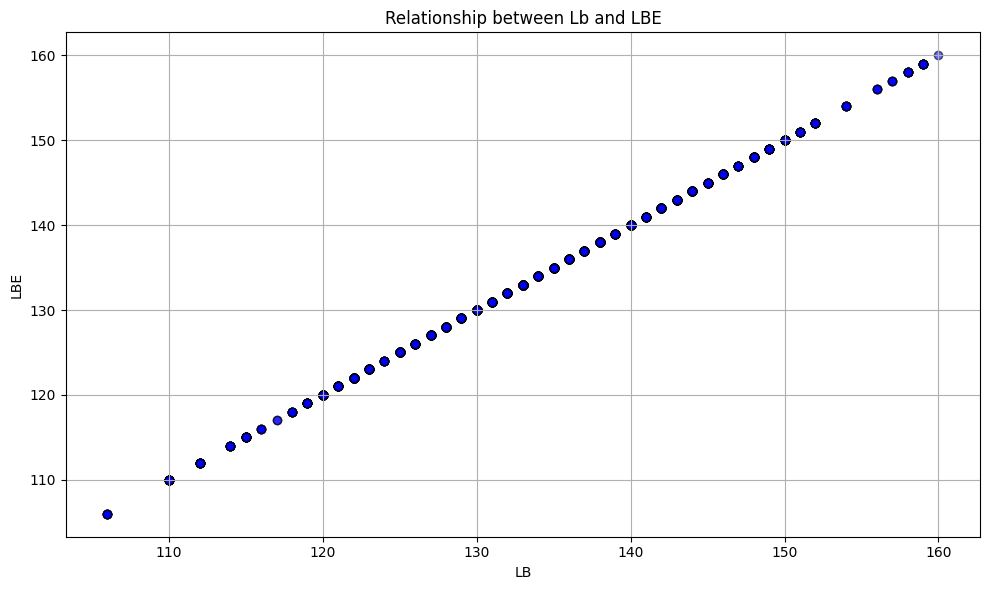

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(Raw_Data['LB'], Raw_Data['LBE'], color='blue', alpha=0.6, edgecolor='k')
plt.title('Relationship between Lb and LBE')
plt.xlabel('LB')
plt.ylabel('LBE')
plt.grid(True)
plt.tight_layout()
plt.show()

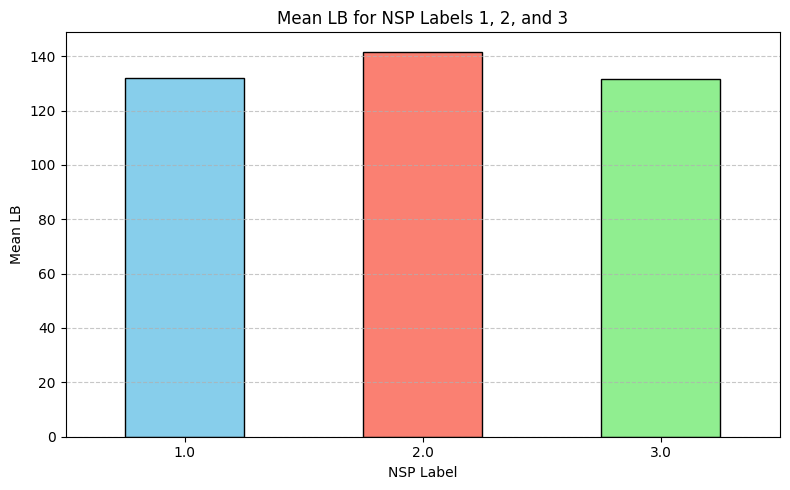

In [10]:
df_filtered = Raw_Data[Raw_Data['NSP'].isin([1, 2, 3])]

mean_lb_by_nsp = df_filtered.groupby('NSP')['LB'].mean()

plt.figure(figsize=(8, 5))
mean_lb_by_nsp.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')

plt.title('Mean LB for NSP Labels 1, 2, and 3')
plt.xlabel('NSP Label')
plt.ylabel('Mean LB')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

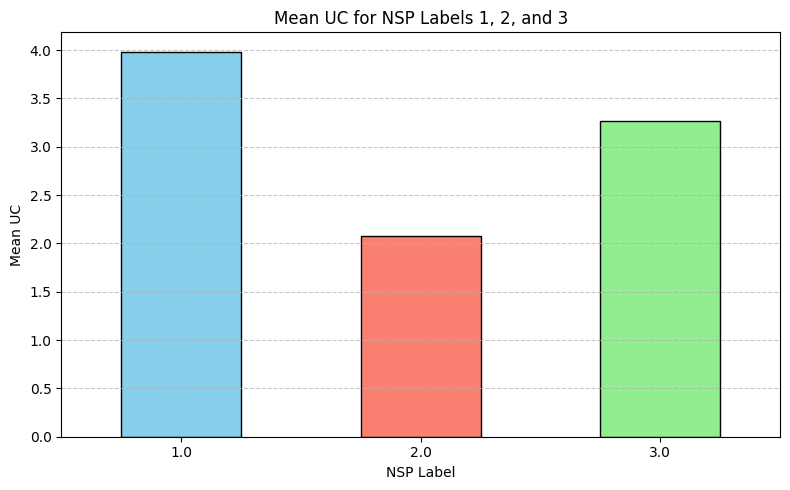

In [12]:
df_filtered = Raw_Data[Raw_Data['NSP'].isin([1, 2, 3])]

mean_lb_by_nsp = df_filtered.groupby('NSP')['UC'].mean()

plt.figure(figsize=(8, 5))
mean_lb_by_nsp.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')

plt.title('Mean UC for NSP Labels 1, 2, and 3')
plt.xlabel('NSP Label')
plt.ylabel('Mean UC')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

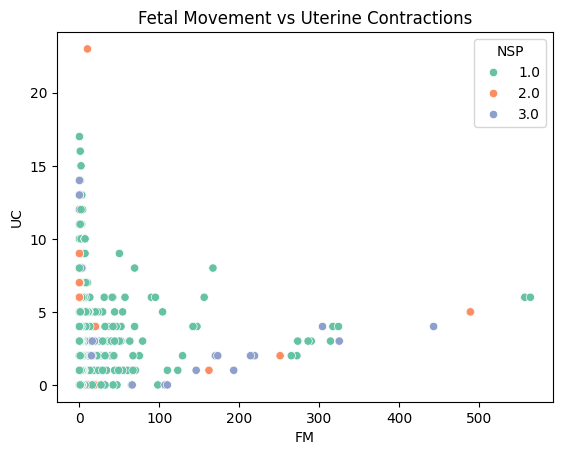

In [14]:
sns.scatterplot(data=Raw_Data, x='FM', y='UC', hue='NSP', palette='Set2')
plt.title("Fetal Movement vs Uterine Contractions")
plt.xlabel("FM")
plt.ylabel("UC")
plt.show()


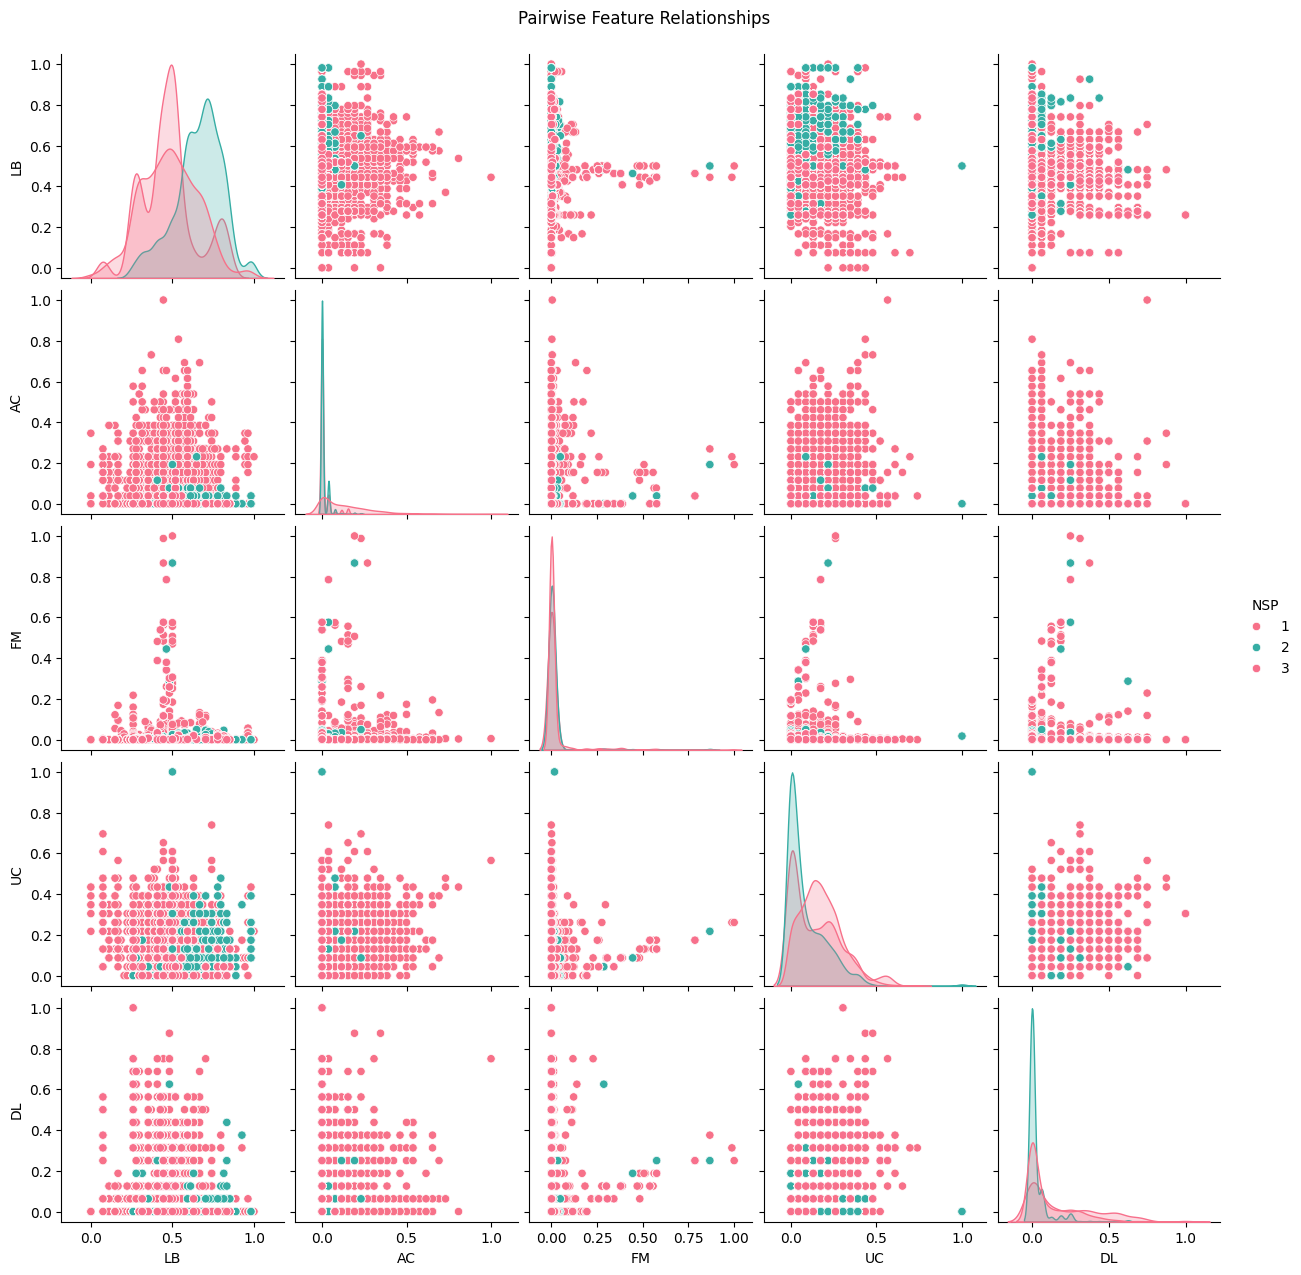

In [65]:
selected_features = ['LB', 'AC', 'FM', 'UC', 'DL']  
sns.pairplot(Raw_Data[selected_features + ['NSP']], hue='NSP', palette='husl')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

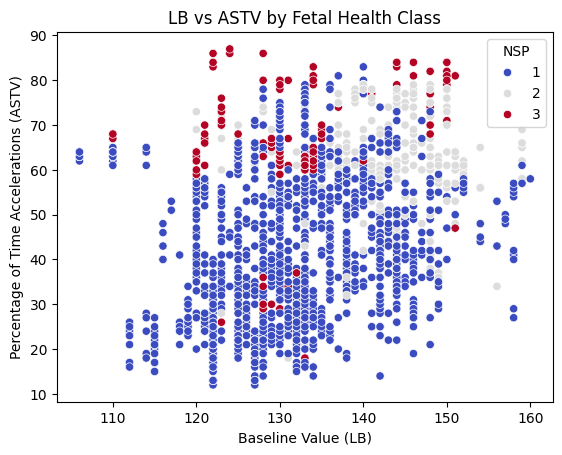

In [66]:
sns.scatterplot(data=Raw_Data, x='LB', y='ASTV', hue='NSP', palette='coolwarm')
plt.title("LB vs ASTV by Fetal Health Class")
plt.xlabel("Baseline Value (LB)")
plt.ylabel("Percentage of Time Accelerations (ASTV)")
plt.show()

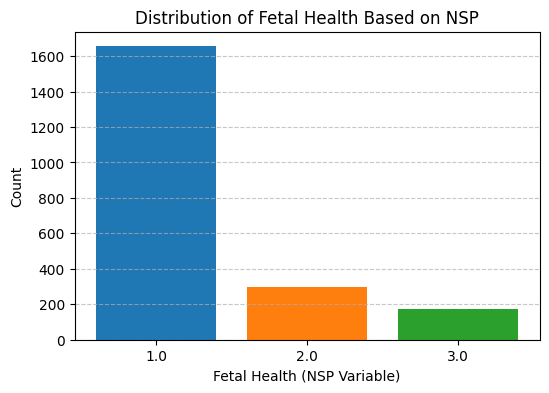

In [15]:
selected_variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 
                      'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 
                      'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']

Raw_Data = Raw_Data[selected_variables]

fetal_health_counts = Raw_Data['NSP'].value_counts().sort_index()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(6, 4))
plt.bar(fetal_health_counts.index.astype(str), fetal_health_counts.values, color=colors)

plt.xlabel("Fetal Health (NSP Variable)")
plt.ylabel("Count")
plt.title("Distribution of Fetal Health Based on NSP")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

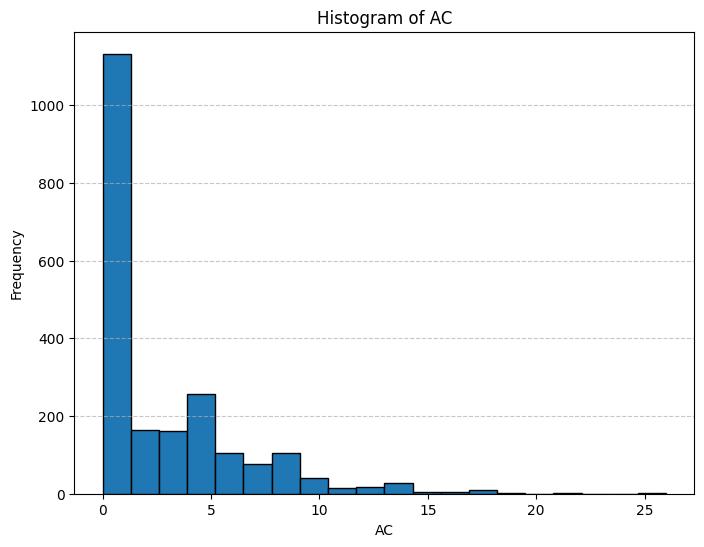

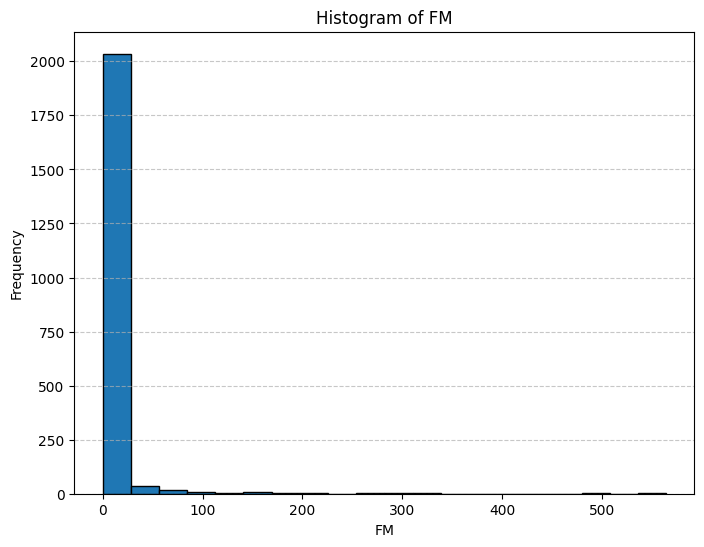

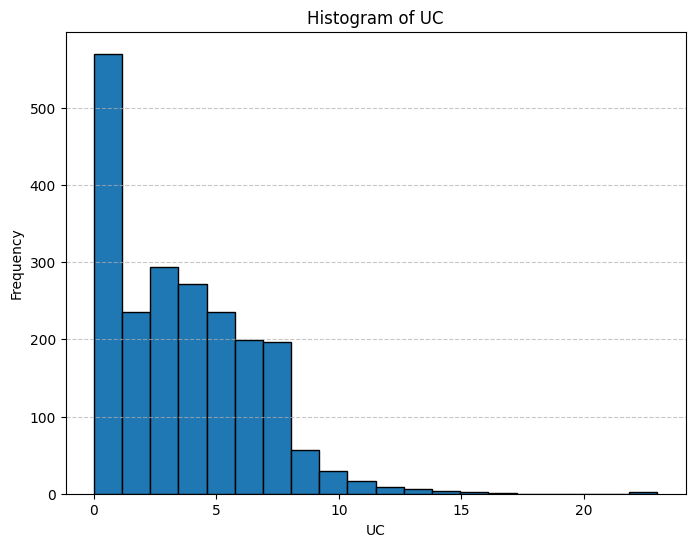

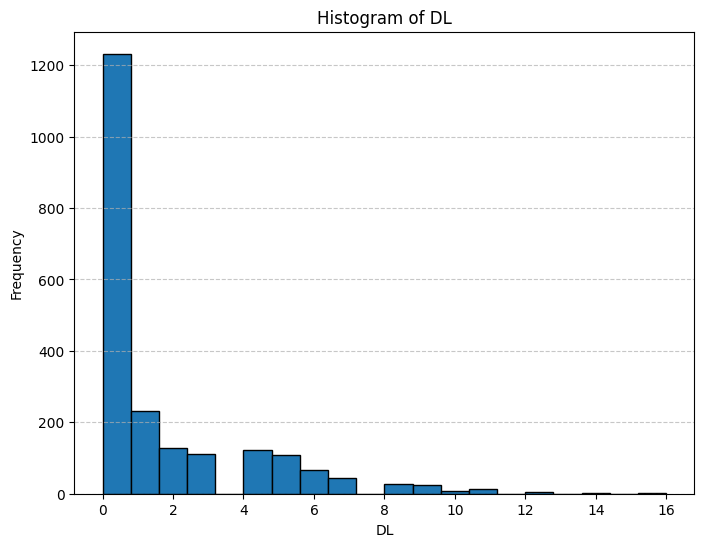

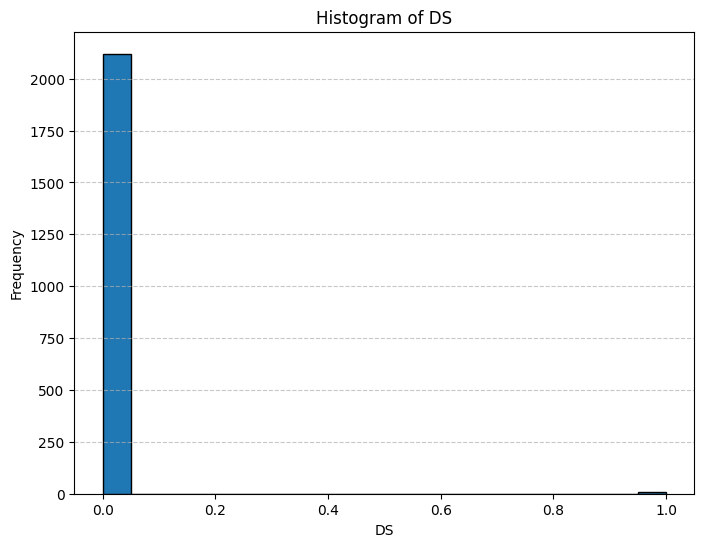

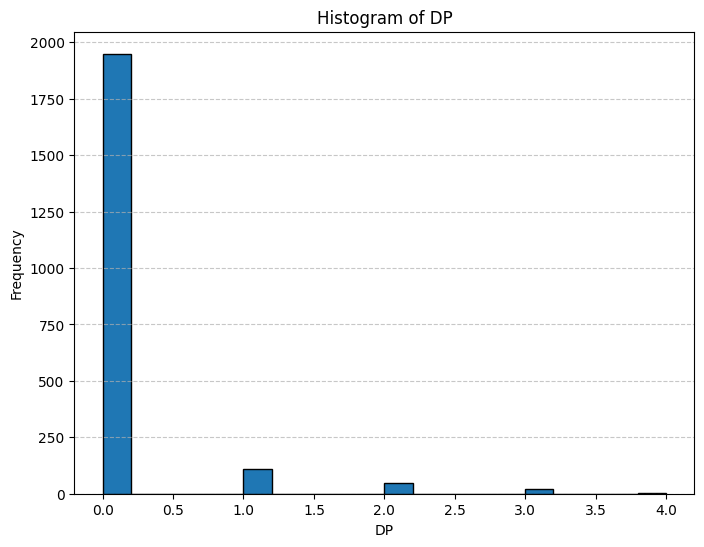

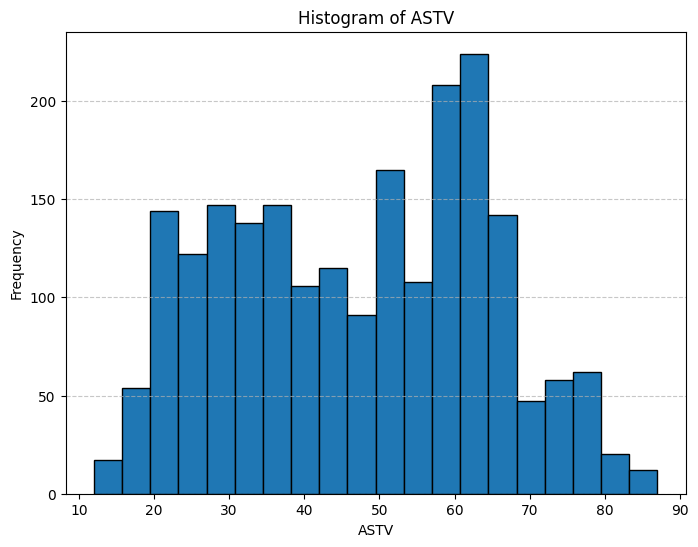

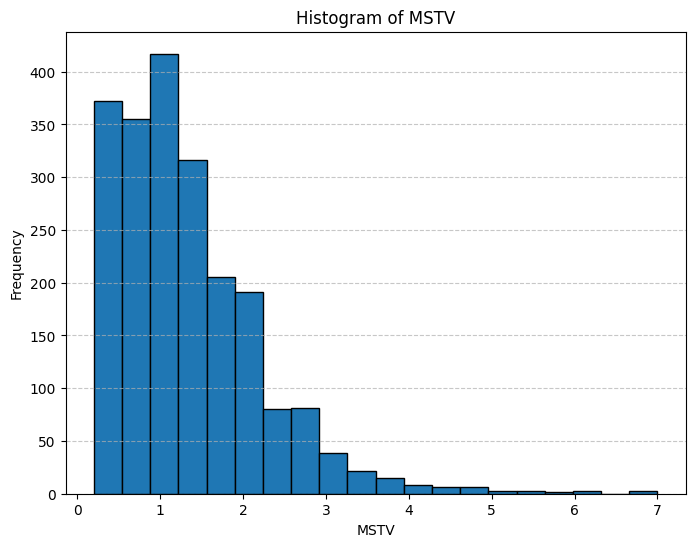

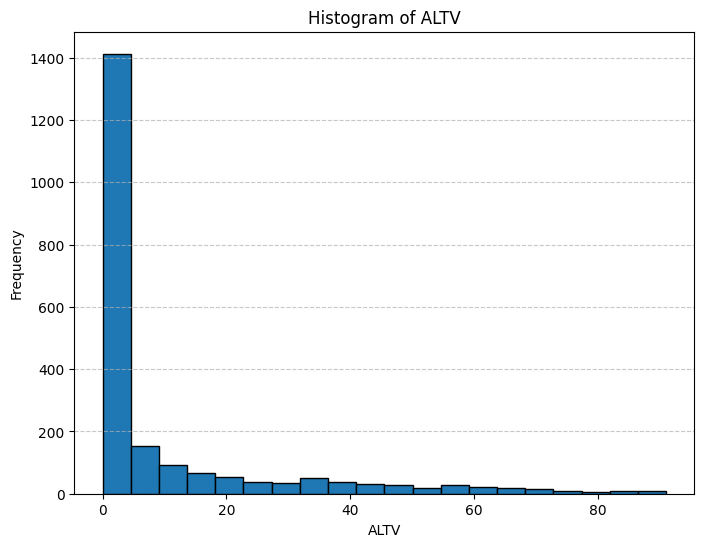

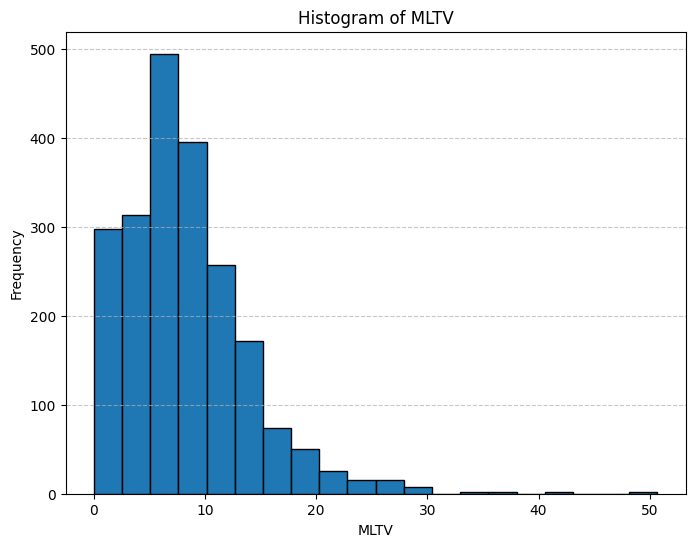

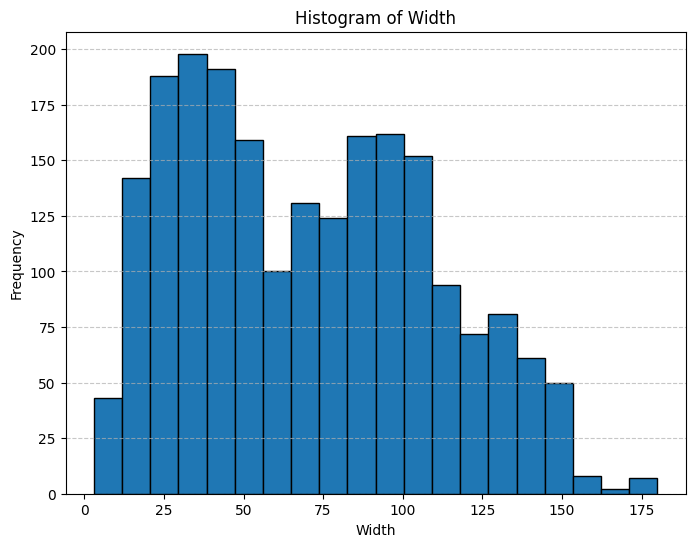

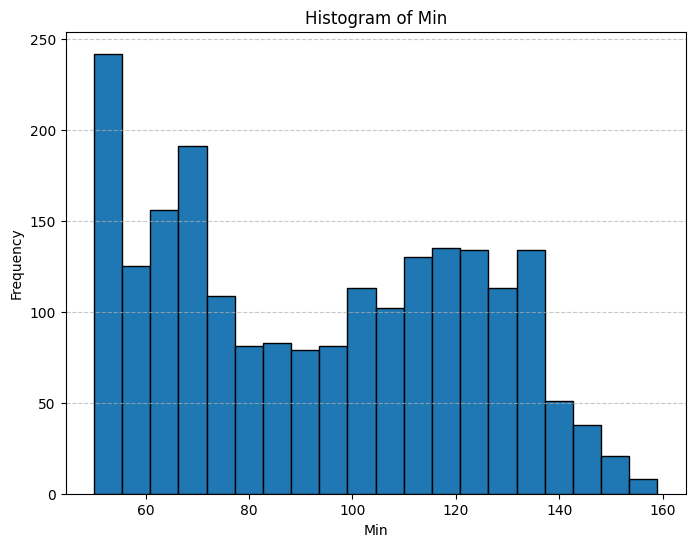

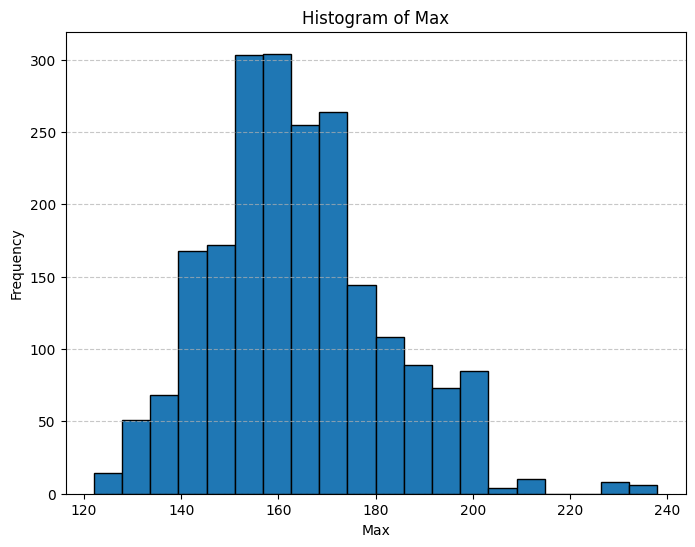

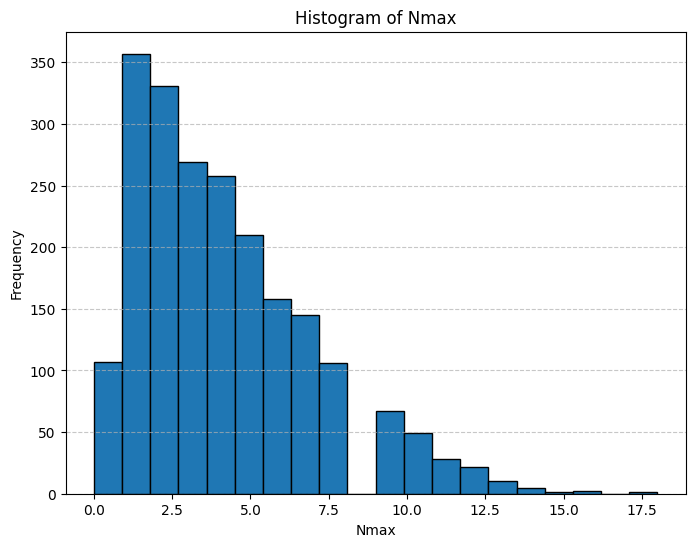

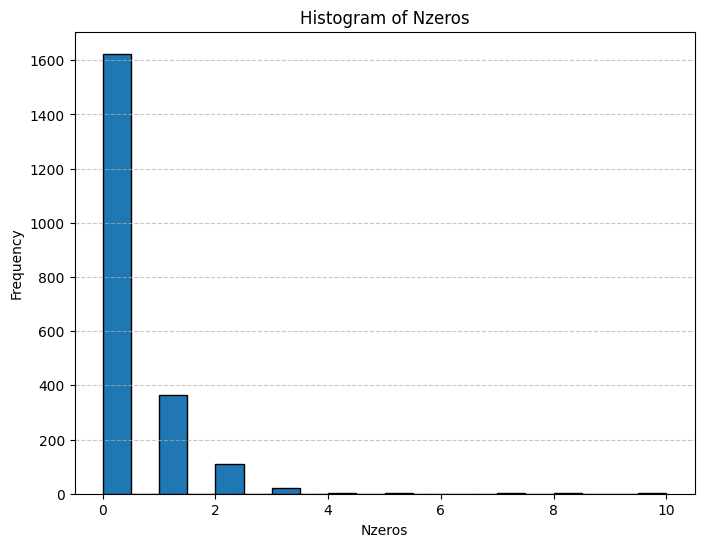

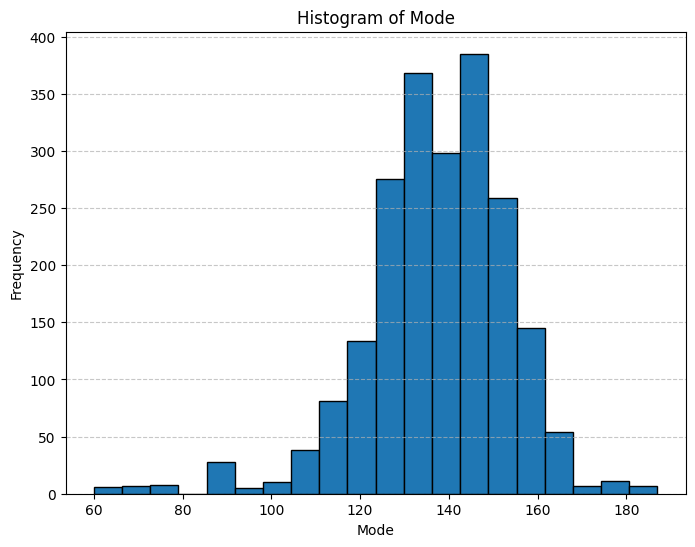

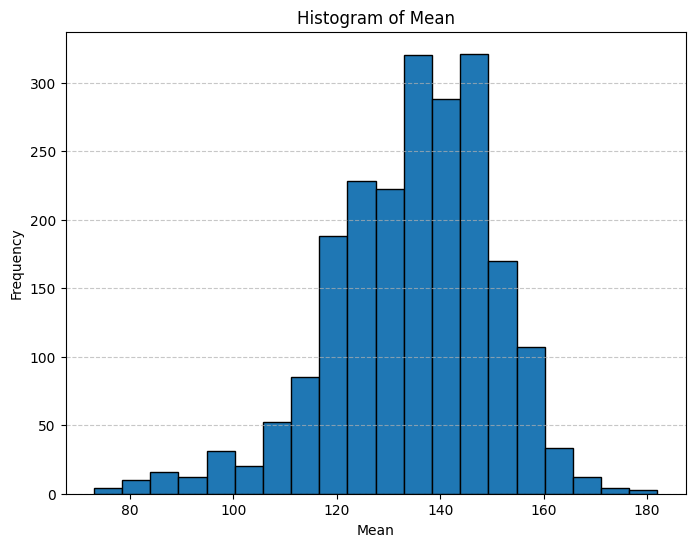

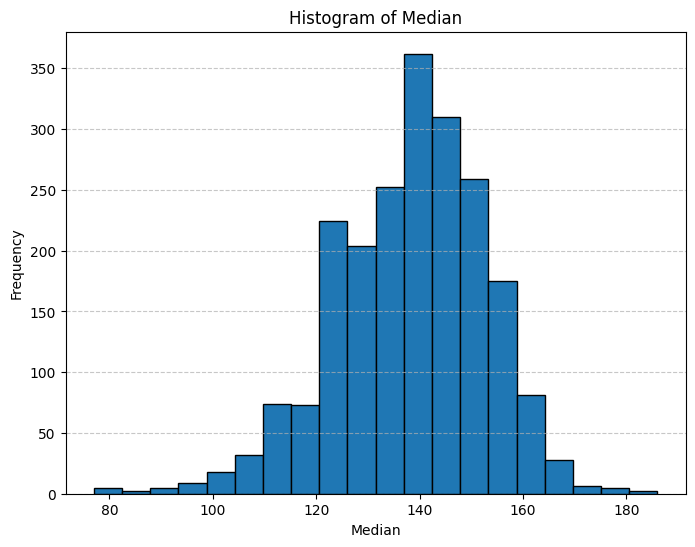

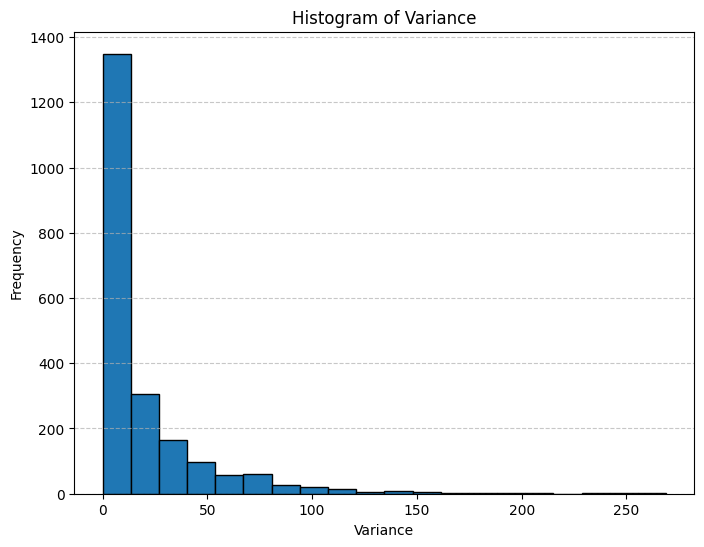

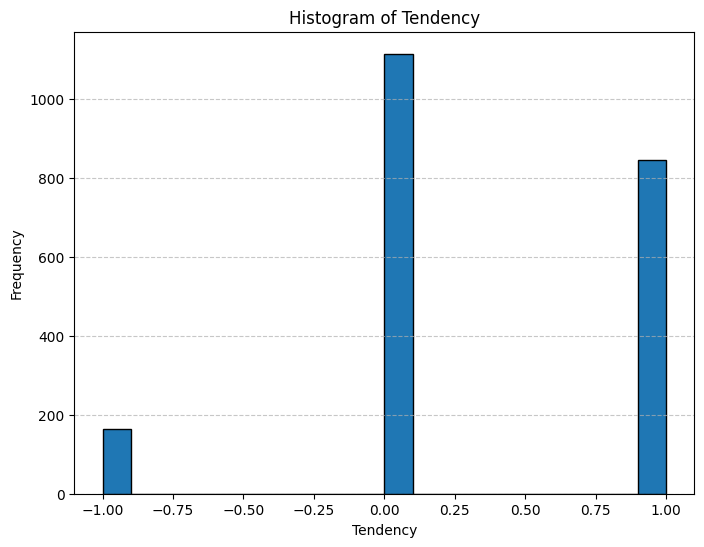

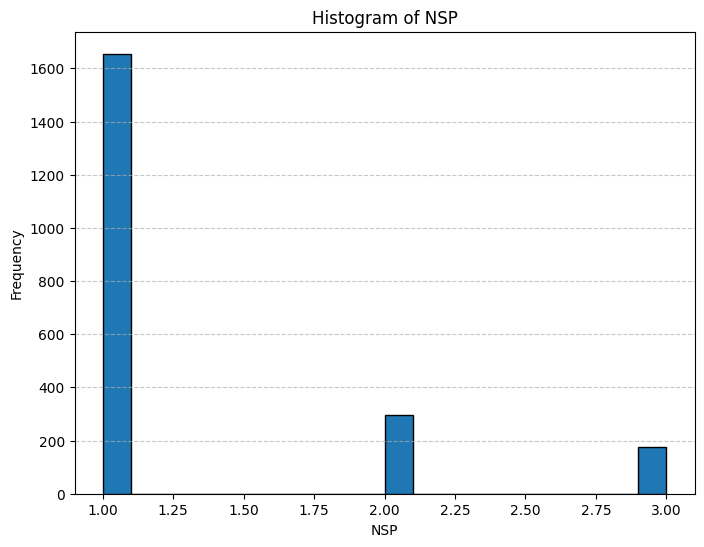

In [16]:
columns = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
           'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
           'Median', 'Variance', 'Tendency', 'NSP']

for column in columns:
    if column in Raw_Data.columns:  
        plt.figure(figsize=(8, 6))
        plt.hist(Raw_Data[column], bins=20, edgecolor='black')  
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

In [17]:
columns = ['LB','AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 
           'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 
           'Median', 'Variance', 'Tendency', 'NSP']
Raw_Data = Raw_Data[columns]

Raw_Data = Raw_Data.dropna(subset=['NSP'])

Raw_Data['NSP'] = Raw_Data['NSP'].astype(int)  

X = Raw_Data.drop('NSP', axis=1)  
y = Raw_Data['NSP']              

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['NSP'])

balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

balanced_df.to_excel('balanced_dataset.xlsx', index=False)

print("Balanced dataset saved as 'balanced_dataset.xlsx'.")

Balanced dataset saved as 'balanced_dataset.xlsx'.


In [18]:
major_data_final = pd.ExcelFile("balanced_dataset.xlsx")  
print(major_data_final.sheet_names)

['Sheet1']


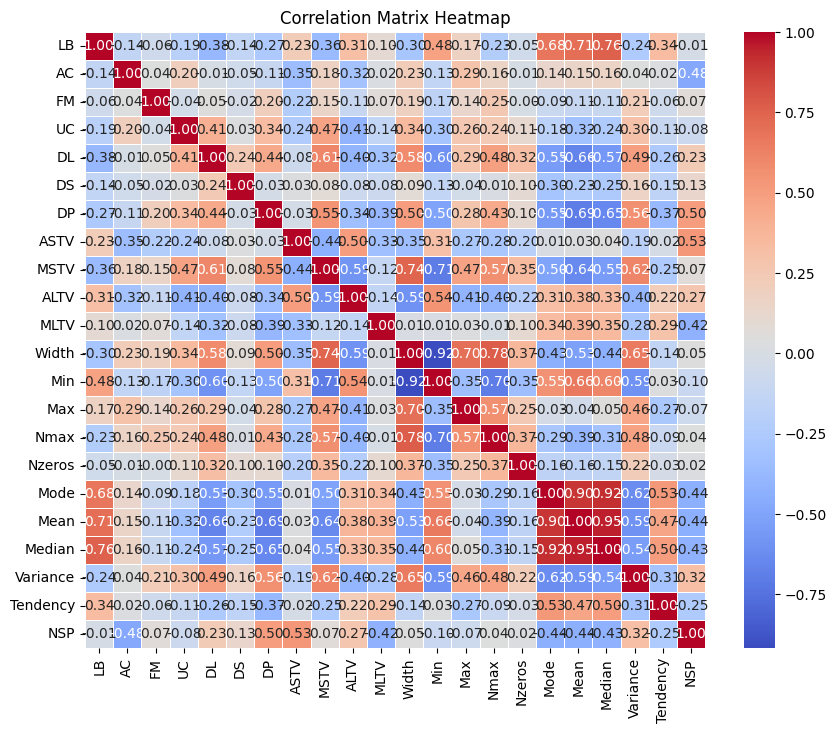

In [19]:
file_path = "balanced_dataset.xlsx"  
df = pd.read_excel(file_path, sheet_name=0)  

corr_matrix = df.corr()

corr_matrix.to_excel("correlation_matrix.xlsx")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
X_resampled = balanced_df.drop('NSP', axis=1) 
y_resampled = balanced_df['NSP']              

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3, random_state=42, stratify=y_resampled)

print("Training set:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("\nTest set:")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training set:
X_train shape: (3475, 21), y_train shape: (3475,)

Test set:
X_test shape: (1490, 21), y_test shape: (1490,)


Best n_estimators: 90 with Accuracy: 0.9919
All Accuracies: [0.9885906040268456, 0.9879194630872483, 0.9899328859060402, 0.991275167785235, 0.991275167785235, 0.9906040268456375, 0.991275167785235, 0.991275167785235, 0.9919463087248322, 0.991275167785235, 0.991275167785235, 0.991275167785235, 0.991275167785235, 0.9906040268456375, 0.9899328859060402, 0.9899328859060402, 0.9899328859060402, 0.9906040268456375, 0.9899328859060402, 0.9892617449664429, 0.9899328859060402, 0.9899328859060402, 0.9906040268456375, 0.9899328859060402, 0.9906040268456375, 0.9906040268456375, 0.9906040268456375, 0.9906040268456375, 0.9899328859060402, 0.9906040268456375, 0.9899328859060402]


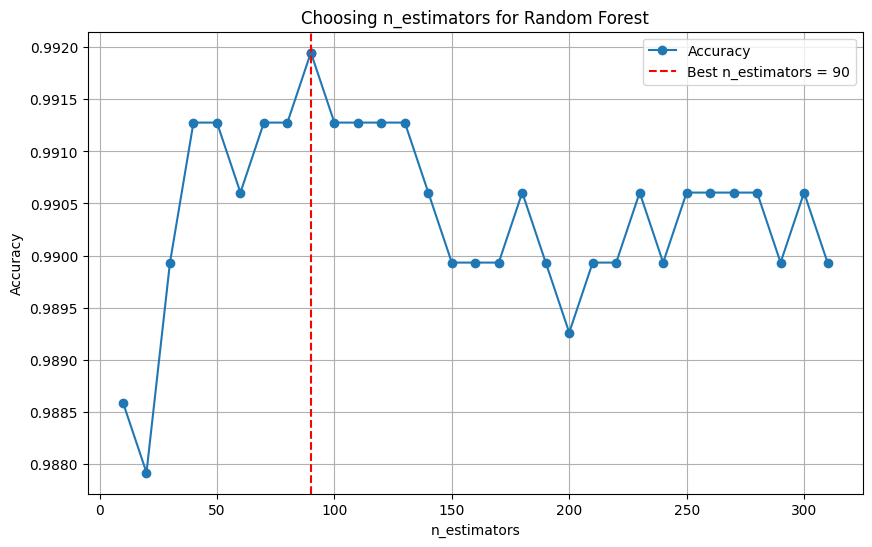

In [21]:
n_est_range = range(10, 320, 10)
accuracies = []

for n in n_est_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

best_index = max(range(len(accuracies)), key=lambda i: accuracies[i])
best_n = n_est_range[best_index]
best_acc = accuracies[best_index]

print(f"Best n_estimators: {best_n} with Accuracy: {best_acc:.4f}")
print("All Accuracies:", accuracies)

plt.figure(figsize=(10, 6))
plt.plot(n_est_range, accuracies, marker='o', label='Accuracy')
plt.axvline(best_n, color='red', linestyle='--', label=f'Best n_estimators = {best_n}')
plt.scatter(best_n, best_acc, color='red')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Choosing n_estimators for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Best max_depth: 19 with Validation Accuracy: 0.9845


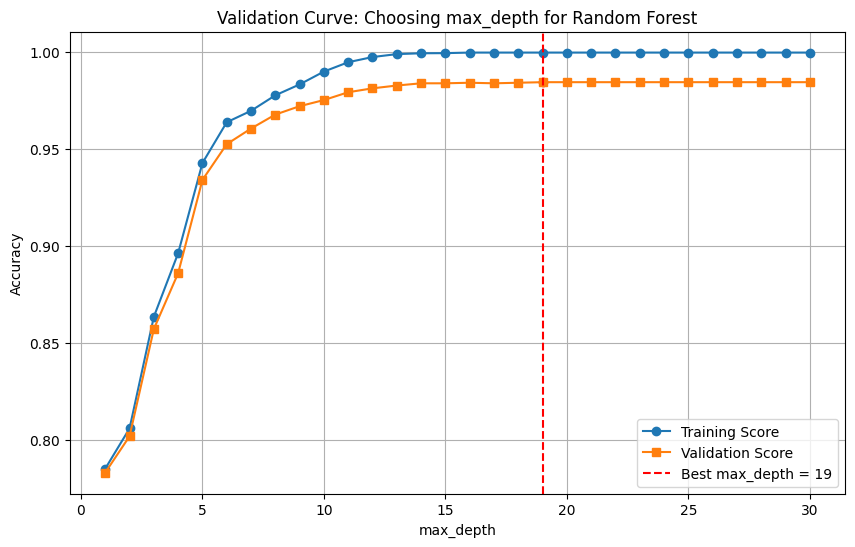

In [22]:
depth_range = np.arange(1, 31)

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='max_depth',
    param_range=depth_range,
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

max_val_acc = np.max(valid_mean)
best_index = np.where(valid_mean == max_val_acc)[0][0]
best_depth = depth_range[best_index]

print(f"Best max_depth: {best_depth} with Validation Accuracy: {max_val_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_mean, label='Training Score', marker='o')
plt.plot(depth_range, valid_mean, label='Validation Score', marker='s')
plt.axvline(best_depth, color='red', linestyle='--', label=f'Best max_depth = {best_depth}')
plt.scatter(best_depth, max_val_acc, color='red')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Choosing max_depth for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Best min_samples_split (smallest with highest val accuracy): 3
Validation Accuracy at this value: 0.9856


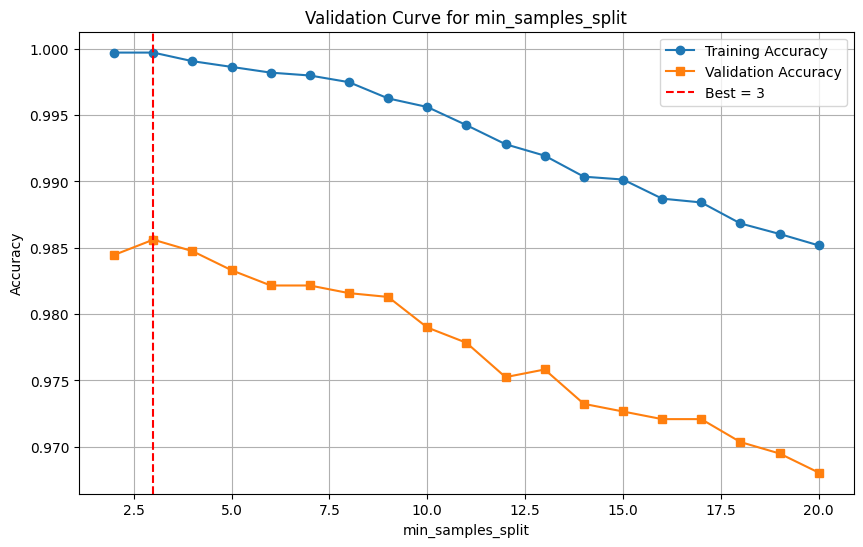

In [23]:
split_range = np.arange(2, 21)

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='min_samples_split',
    param_range=split_range,
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

max_val_acc = np.max(valid_mean)
best_index = np.where(valid_mean == max_val_acc)[0][0]
best_split = split_range[best_index]

print(f"Best min_samples_split (smallest with highest val accuracy): {best_split}")
print(f"Validation Accuracy at this value: {max_val_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(split_range, train_mean, label='Training Accuracy', marker='o')
plt.plot(split_range, valid_mean, label='Validation Accuracy', marker='s')
plt.axvline(best_split, color='red', linestyle='--', label=f'Best = {best_split}')
plt.scatter(best_split, max_val_acc, color='red')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Validation Curve for min_samples_split')
plt.legend()
plt.grid(True)
plt.show()

Best min_samples_leaf (smallest with highest validation accuracy): 1
Validation Accuracy at this value: 0.9845


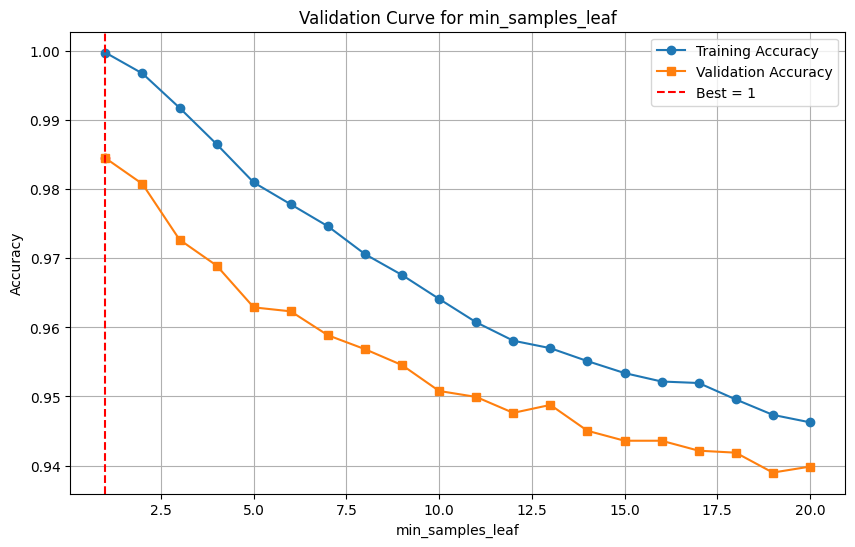

In [24]:
leaf_range = np.arange(1, 21)

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='min_samples_leaf',
    param_range=leaf_range,
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

max_val_acc = np.max(valid_mean)
best_index = np.where(valid_mean == max_val_acc)[0][0]
best_leaf = leaf_range[best_index]

print(f"Best min_samples_leaf (smallest with highest validation accuracy): {best_leaf}")
print(f"Validation Accuracy at this value: {max_val_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(leaf_range, train_mean, label='Training Accuracy', marker='o')
plt.plot(leaf_range, valid_mean, label='Validation Accuracy', marker='s')
plt.axvline(best_leaf, color='red', linestyle='--', label=f'Best = {best_leaf}')
plt.scatter(best_leaf, max_val_acc, color='red')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Validation Curve for min_samples_leaf')
plt.grid(True)
plt.legend()
plt.show()


Best max_features (smallest with highest val accuracy): 0.10
Validation Accuracy at this value: 0.9862


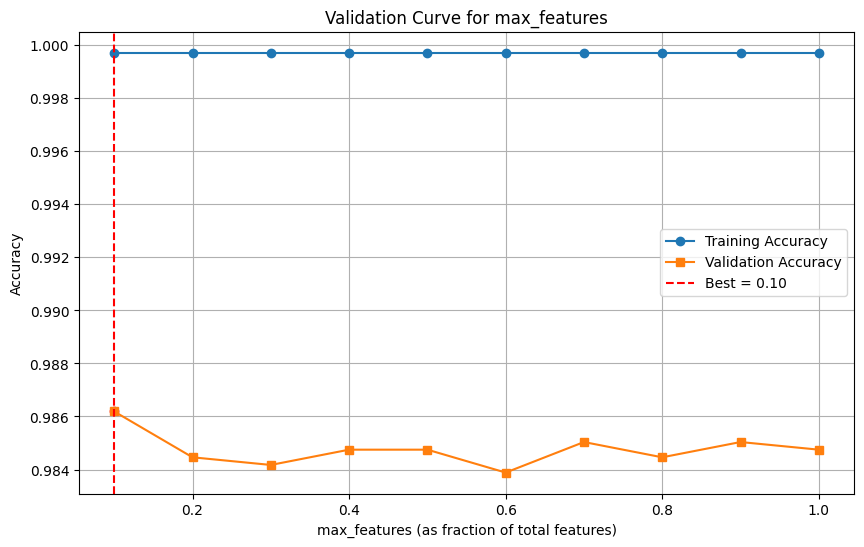

In [25]:
features_range = np.linspace(0.1, 1.0, 10)

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='max_features',
    param_range=features_range,
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

max_val_acc = np.max(valid_mean)
best_index = np.where(valid_mean == max_val_acc)[0][0]
best_features = features_range[best_index]

print(f"Best max_features (smallest with highest val accuracy): {best_features:.2f}")
print(f"Validation Accuracy at this value: {max_val_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(features_range, train_mean, label='Training Accuracy', marker='o')
plt.plot(features_range, valid_mean, label='Validation Accuracy', marker='s')
plt.axvline(best_features, color='red', linestyle='--', label=f'Best = {best_features:.2f}')
plt.scatter(best_features, max_val_acc, color='red')
plt.xlabel('max_features (as fraction of total features)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for max_features')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
rf_model = RandomForestClassifier(
    n_estimators=60,         
    max_depth=20,             
    min_samples_split=3,      
    min_samples_leaf=1,       
    max_features=0.70,         
    random_state=42,          
    n_jobs=-1,                
    oob_score=True,           
    bootstrap=True            
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

if hasattr(rf_model, 'oob_score_'):
    print(f"OOB Score: {rf_model.oob_score_:.4f}")

Accuracy: 0.9899

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       496
           2       0.98      1.00      0.99       497
           3       0.99      1.00      1.00       497

    accuracy                           0.99      1490
   macro avg       0.99      0.99      0.99      1490
weighted avg       0.99      0.99      0.99      1490

OOB Score: 0.9882


In [27]:
print(len(y_train), len(y_test))

3475 1490


Length of y_test: 1490
Length of y_pred: 1490


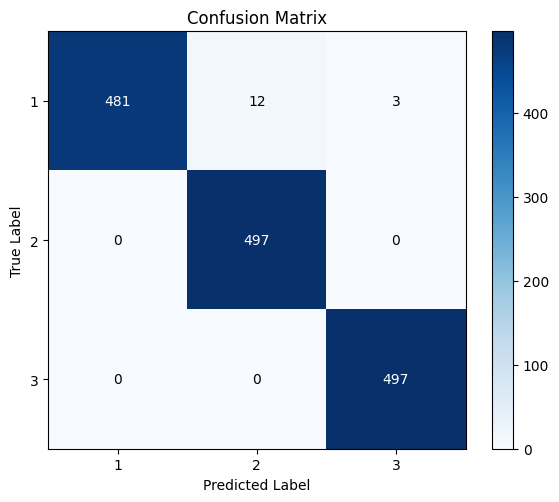

In [28]:
y_pred = rf_model.predict(X_test)

print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

if len(y_test) != len(y_pred):
    raise ValueError("Mismatch between y_test and y_pred lengths")

cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)  

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()


In [29]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [10, 20, 30, None],      
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2', None]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.9853237410071942
Test Accuracy: 0.9892617449664429


In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svc_model = SVC(kernel='linear', probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('SVM', svc_model), ('Logistic Regression', lr_model)],
    voting='hard'  
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Hard Voting Classifier Accuracy: {accuracy:.2f}")

Hard Voting Classifier Accuracy: 0.88


In [31]:
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")

SVM Accuracy: 0.8677852348993289


In [32]:
y_mapped = y - y.min()

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print(f"XGB Accuracy: {accuracy_score(y_test, xgb_pred)}")

XGB Accuracy: 0.957680250783699


In [33]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
print(f"LGBM Accuracy: {accuracy_score(y_test, lgbm_pred)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.249875
[LightGBM] [Info] Start training from score -2.037330
[LightGBM] [Info] Start training from score -2.399913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBM Accuracy: 0.957680250783699


In [34]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")

Decision Tree Accuracy: 0.9310344827586207


In [35]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

Random Forest Accuracy: 0.9388714733542319


In [36]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)
print(f"Extra Trees Accuracy: {accuracy_score(y_test, et_pred)}")

Extra Trees Accuracy: 0.9388714733542319


In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(f"K-Neighbors Accuracy: {accuracy_score(y_test, knn_pred)}")

K-Neighbors Accuracy: 0.8871473354231975


In [38]:
lgbm_svm = StackingClassifier(
    estimators=[('lgbm', lgbm_model), ('svm', svm_model)],
    final_estimator=SVC(probability=True, kernel='linear', random_state=42)
)
lgbm_svm.fit(X_train, y_train)
lgbm_svm_pred = lgbm_svm.predict(X_test)
print(f"LGBM + SVM Accuracy: {accuracy_score(y_test, lgbm_svm_pred)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.249875
[LightGBM] [Info] Start training from score -2.037330
[LightGBM] [Info] Start training from score -2.399913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 20
[LightGBM] [Info] Start training from

In [39]:
xgb_svm = StackingClassifier(
    estimators=[('xgb', xgb_model), ('svm', svm_model)],
    final_estimator=SVC(probability=True, kernel='linear', random_state=42)
)
xgb_svm.fit(X_train, y_train)
xgb_svm_pred = xgb_svm.predict(X_test)
print(f"XGB + SVM Accuracy: {accuracy_score(y_test, xgb_svm_pred)}")

XGB + SVM Accuracy: 0.9592476489028213


In [40]:
rf_svm = StackingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model)],
    final_estimator=SVC(probability=True, kernel='linear', random_state=42)
)
rf_svm.fit(X_train, y_train)
rf_svm_pred = rf_svm.predict(X_test)
print(f"RF + SVM Accuracy: {accuracy_score(y_test, rf_svm_pred)}")

RF + SVM Accuracy: 0.9341692789968652


In [41]:
dt_svm = StackingClassifier(
    estimators=[('dt', dt_model), ('svm', svm_model)],
    final_estimator=SVC(probability=True, kernel='linear', random_state=42)
)
dt_svm.fit(X_train, y_train)
dt_svm_pred = dt_svm.predict(X_test)
print(f"DT + SVM Accuracy: {accuracy_score(y_test, dt_svm_pred)}")

DT + SVM Accuracy: 0.9420062695924765


In [42]:
et_lgbm = StackingClassifier(
    estimators=[('et', et_model), ('lgbm', lgbm_model)],
    final_estimator=LGBMClassifier(random_state=42)
)
et_lgbm.fit(X_train, y_train)
et_lgbm_pred = et_lgbm.predict(X_test)
print(f"ET + LGBM Accuracy: {accuracy_score(y_test, et_lgbm_pred)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.249875
[LightGBM] [Info] Start training from score -2.037330
[LightGBM] [Info] Start training from score -2.399913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 20
[LightGBM] [Info] Start training from

In [43]:
dt_et = StackingClassifier(
    estimators=[('dt', dt_model), ('et', et_model)],
    final_estimator=ExtraTreesClassifier(random_state=42)
)
dt_et.fit(X_train, y_train)
dt_et_pred = dt_et.predict(X_test)
print(f"DT + ET Accuracy: {accuracy_score(y_test, dt_et_pred)}")

DT + ET Accuracy: 0.9357366771159875


In [44]:
xgb_et = StackingClassifier(
    estimators=[('xgb', xgb_model), ('et', et_model)],
    final_estimator=ExtraTreesClassifier(random_state=42)
)
xgb_et.fit(X_train, y_train)
xgb_et_pred = xgb_et.predict(X_test)
print(f"XGB + ET Accuracy: {accuracy_score(y_test, xgb_et_pred)}")

XGB + ET Accuracy: 0.9435736677115988


In [45]:
svm_et_rf = StackingClassifier(
    estimators=[('svm', svm_model), ('et', et_model), ('rf', rf_model)],
    final_estimator=SVC(probability=True, kernel='linear', random_state=42)
)
svm_et_rf.fit(X_train, y_train)
svm_et_rf_pred = svm_et_rf.predict(X_test)
print(f"SVM + ET + RF Accuracy: {accuracy_score(y_test, svm_et_rf_pred)}")

SVM + ET + RF Accuracy: 0.9357366771159875


In [46]:
print("Classes:", np.unique(y))

Classes: [1 2 3]


In [47]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[479  12   5]
 [ 60  38   3]
 [  7   7  27]]


In [48]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

cm_xgb = confusion_matrix(y_test, xgb_pred)
print("XGB Confusion Matrix:")
print(cm_xgb)

XGB Confusion Matrix:
[[485   9   2]
 [ 12  86   3]
 [  1   0  40]]


In [49]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

cm_lgbm = confusion_matrix(y_test, lgbm_pred)
print("LGBM Confusion Matrix:")
print(cm_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.249875
[LightGBM] [Info] Start training from score -2.037330
[LightGBM] [Info] Start training from score -2.399913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBM Confusion Matrix:
[[486   9   1]
 [ 14  86   1]
 [  1   1  39]]


In [50]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

Decision Tree Confusion Matrix:
[[472  17   7]
 [ 14  83   4]
 [  2   0  39]]


In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(cm_rf)

Random Forest Confusion Matrix:
[[486   7   3]
 [ 22  76   3]
 [  2   2  37]]


In [52]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)

cm_et = confusion_matrix(y_test, et_pred)
print("Extra Trees Confusion Matrix:")
print(cm_et)

Extra Trees Confusion Matrix:
[[487   8   1]
 [ 22  74   5]
 [  1   2  38]]


In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, knn_pred)
print("KNN Confusion Matrix:")
print(cm_knn)

KNN Confusion Matrix:
[[472  21   3]
 [ 34  63   4]
 [  5   5  31]]


In [54]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

meta_model = SVC(probability=True, random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

cm_stacking = confusion_matrix(y_test, stacking_pred)
print("Stacking Classifier Confusion Matrix:")
print(cm_stacking)

Stacking Classifier Confusion Matrix:
[[484   9   3]
 [ 15  81   5]
 [  1   1  39]]


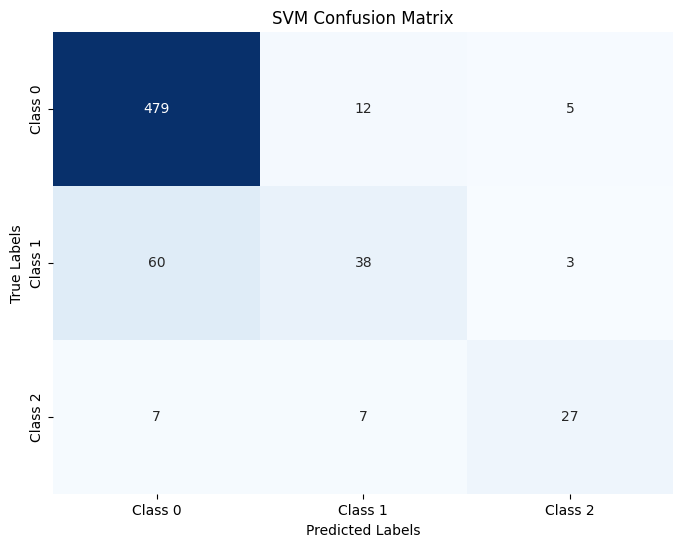

In [55]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

plot_confusion_matrix(y_test, svm_pred, title="SVM Confusion Matrix")

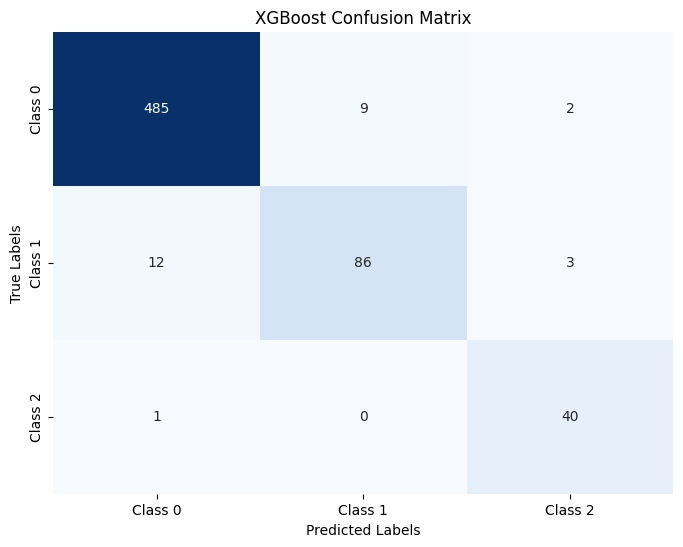

In [56]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

plot_confusion_matrix(y_test, xgb_pred, title="XGBoost Confusion Matrix")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.249875
[LightGBM] [Info] Start training from score -2.037330
[LightGBM] [Info] Start training from score -2.399913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


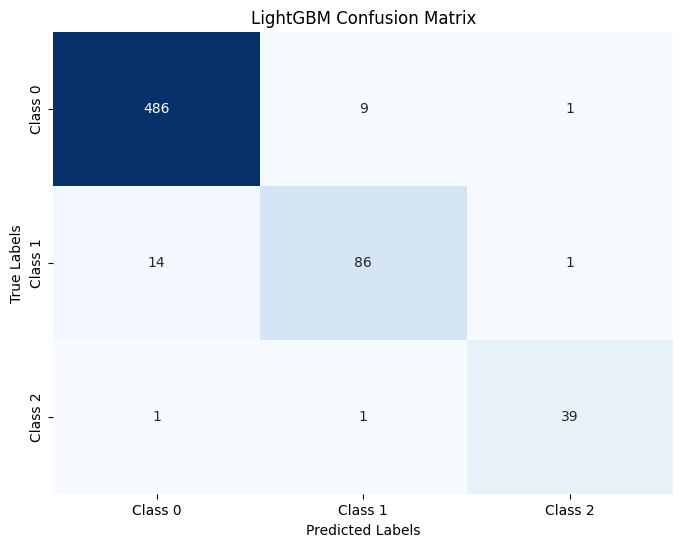

In [57]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

plot_confusion_matrix(y_test, lgbm_pred, title="LightGBM Confusion Matrix")

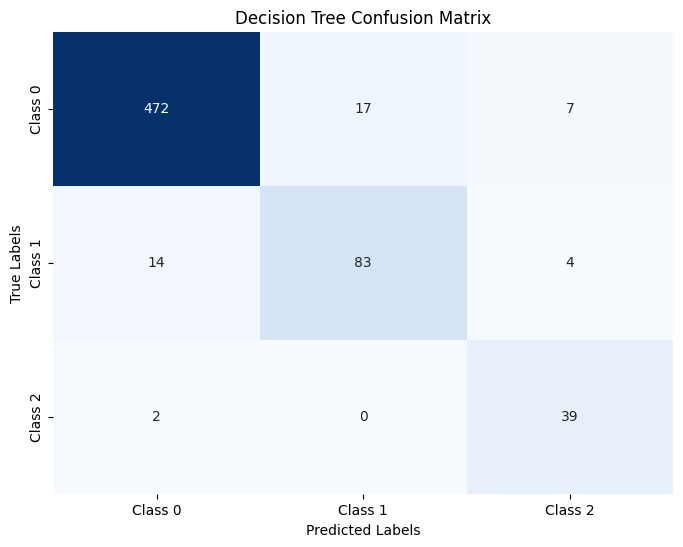

In [58]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

plot_confusion_matrix(y_test, dt_pred, title="Decision Tree Confusion Matrix")

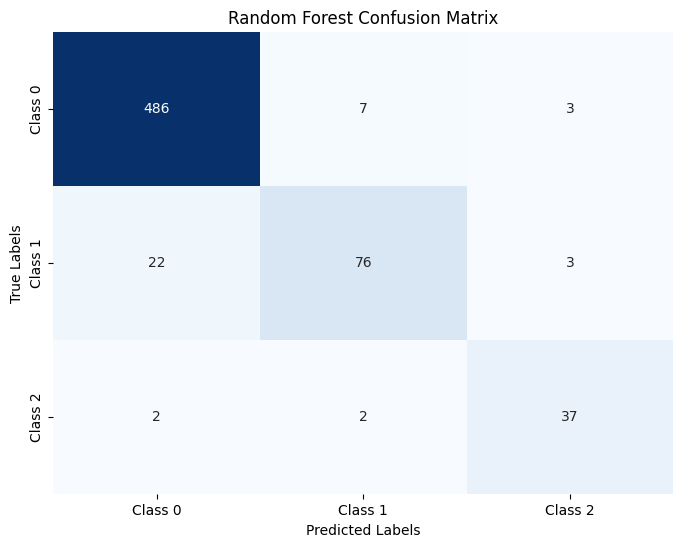

In [59]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

plot_confusion_matrix(y_test, rf_pred, title="Random Forest Confusion Matrix")

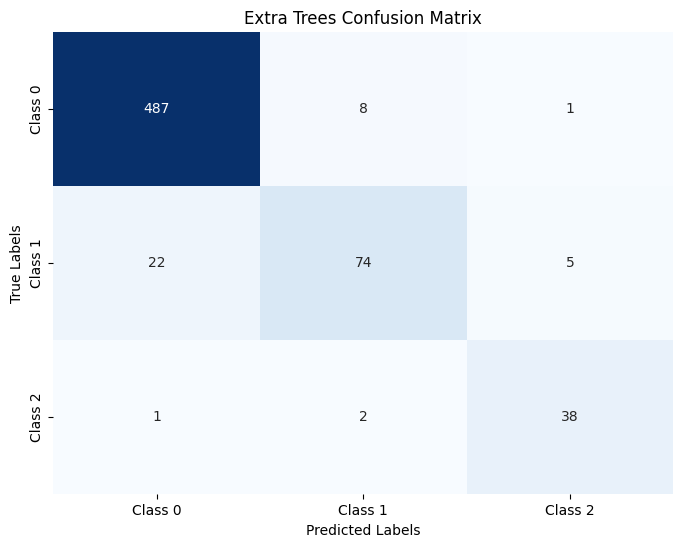

In [60]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

et_pred = et_model.predict(X_test)

plot_confusion_matrix(y_test, et_pred, title="Extra Trees Confusion Matrix")

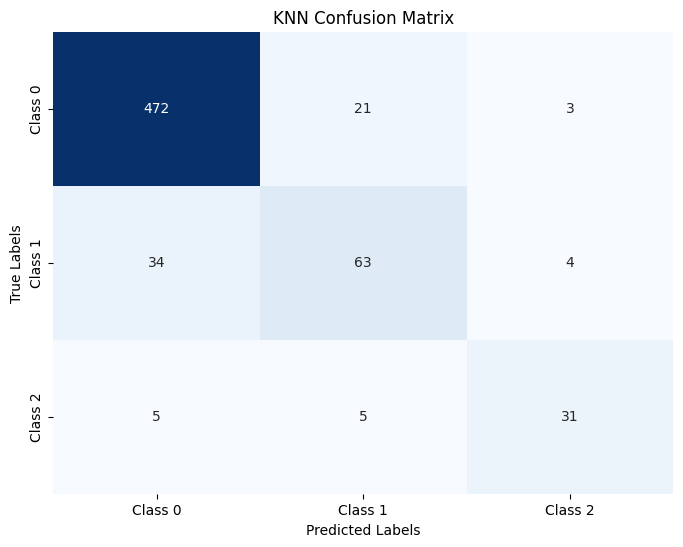

In [61]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

plot_confusion_matrix(y_test, knn_pred, title="KNN Confusion Matrix")

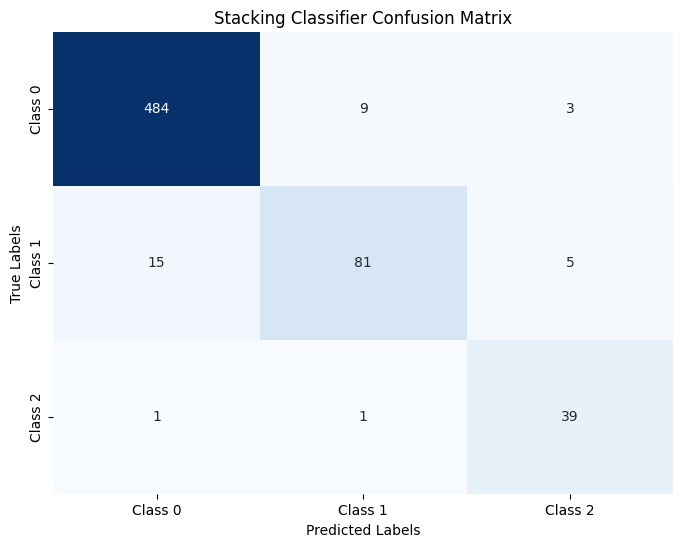

In [62]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

meta_model = SVC(random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

stacking_pred = stacking_model.predict(X_test)

plot_confusion_matrix(y_test, stacking_pred, title="Stacking Classifier Confusion Matrix")

C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:06:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


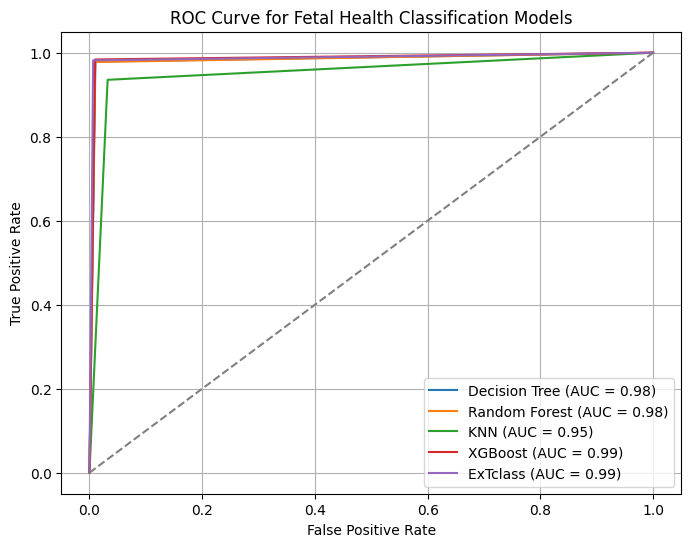

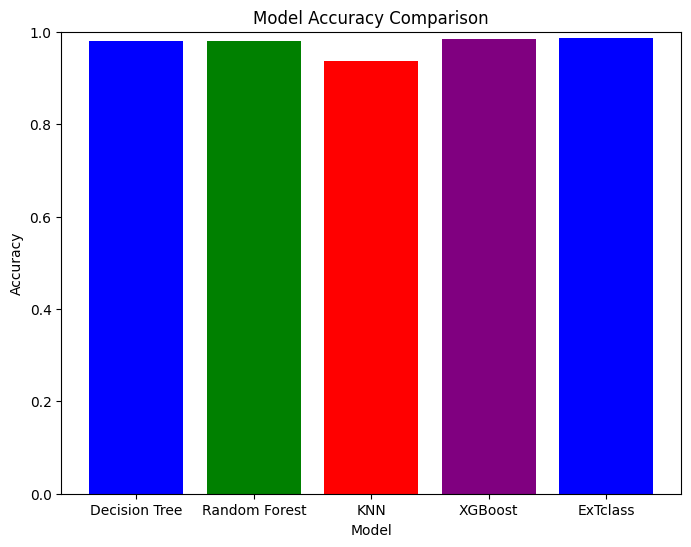

In [63]:
X = balanced_df.drop(columns=["NSP"])  
y = balanced_df["NSP"]

y_bin = label_binarize(y, classes=[1, 2, 3])  

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "ExTclass":ExtraTreesClassifier()
}

accuracy_scores = {}
roc_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    accuracy_scores[name] = accuracy

    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fetal Health Classification Models")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


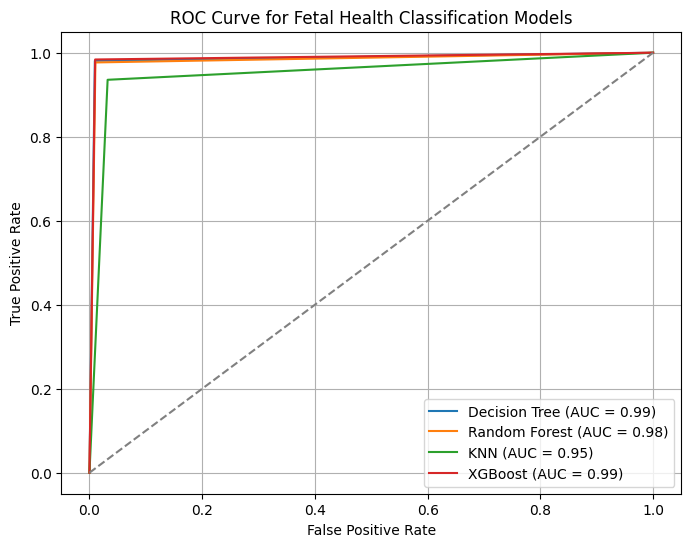

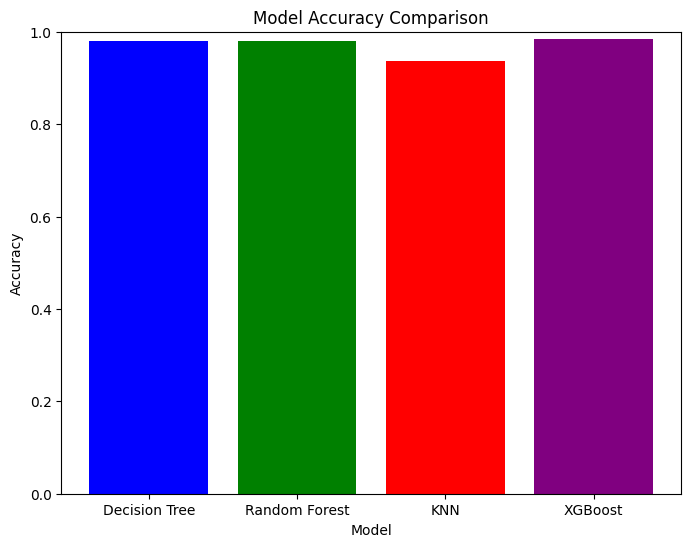

In [64]:
y_bin = label_binarize(y, classes=[1, 2, 3])  

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

accuracy_scores = {}
roc_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    accuracy_scores[name] = accuracy

    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fetal Health Classification Models")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()